In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import skew, kurtosis
import scipy.stats as stats


In [3]:
# Create a dataframe using the csv file
rec = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\loan_sanction_test.csv')

In [4]:
# Checking the nan values
rec.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
# Deleting the missing data and rechecking the data
rec = rec.dropna()
rec.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [6]:
# To determine the dimension of the DataFrame
rec.shape

(289, 12)

In [7]:
# To check whether there is any duplicate datas
rec.duplicated().value_counts()

False    289
Name: count, dtype: int64

In [8]:
rec

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


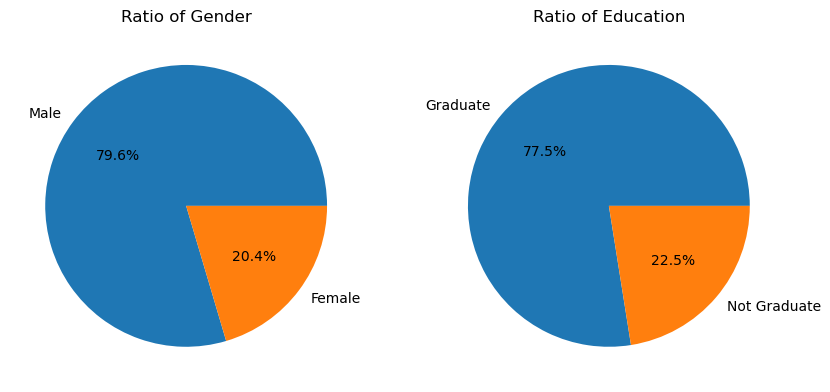

In [18]:
a = rec['Gender'].value_counts()
b = rec['Education'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# Create a pie chart
ax1.pie(a, labels=a.index, autopct='%1.1f%%')
ax1.set_title('Ratio of Gender')
ax2.pie(b, labels=b.index, autopct='%1.1f%%') 
plt.title('Ratio of Education')

plt.show()

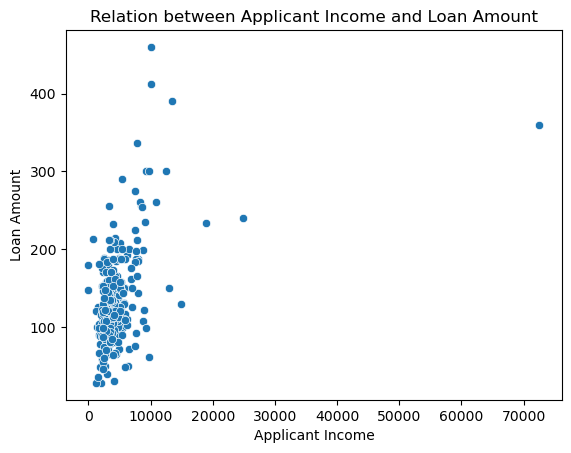

In [34]:
# Create a scatter plot with Applicant Income and Loan Amount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=rec)

plt.title('Relation between Applicant Income and Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

plt.show()

In [35]:
# Calculating the highest Applicant Income
highest_income = max(rec["ApplicantIncome"])
print('Higher Applicant Income is:', highest_income)

# Calculating the highest loan amount
higher_loan_amount = max(rec['LoanAmount'])
print('Higher loan amount:', higher_loan_amount)

Higher Applicant Income is: 72529
Higher loan amount: 460.0


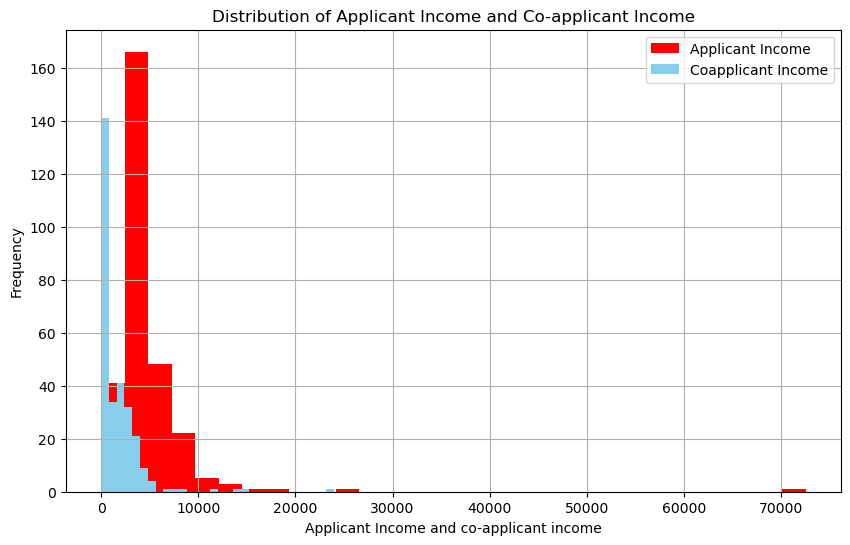

In [36]:
plt.figure(figsize=(10, 6))

# Histogram for Applicant Income
plt.hist(rec['ApplicantIncome'], bins=30, color='red', label= 'Applicant Income')

# Histogram for Coapplicant Income
plt.hist(rec['CoapplicantIncome'], bins=30, color='skyblue', label='Coapplicant Income')

plt.title('Distribution of Applicant Income and Co-applicant Income')
plt.xlabel('Applicant Income and co-applicant income')
plt.ylabel('Frequency')

plt.grid(True)

plt.legend()

plt.show()

In [37]:
# Displaying the basic statistical function
rec['ApplicantIncome'].describe()

count      289.000000
mean      4637.352941
std       4790.683934
min          0.000000
25%       2875.000000
50%       3833.000000
75%       5000.000000
max      72529.000000
Name: ApplicantIncome, dtype: float64

In [38]:
# Calculating the mean of the co-applicant income
rec['CoapplicantIncome'].mean()

1528.2629757785467

In [39]:
# Displaying the standard deviation of Co-applicant income
rec['CoapplicantIncome'].std()

2377.5992092966485

In [40]:
# Displaying the max of Co-applicant income
rec['CoapplicantIncome'].max()

24000

In [41]:
# Converting all the elements in the dataset to numeric values
rec_numeric= rec.apply(pd.to_numeric,errors='coerce')


# Calculating the correlation between Loan amount, Applicant
Correlation = rec[['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']].corr()
Correlation

,LoanAmount,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term
LoanAmount,1.000000,0.445695,0.230355,0.115750
ApplicantIncome,0.445695,1.000000,-0.084353,0.022727
CoapplicantIncome,0.230355,-0.084353,1.000000,-0.000621
Loan_Amount_Term,0.115750,0.022727,-0.000621,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

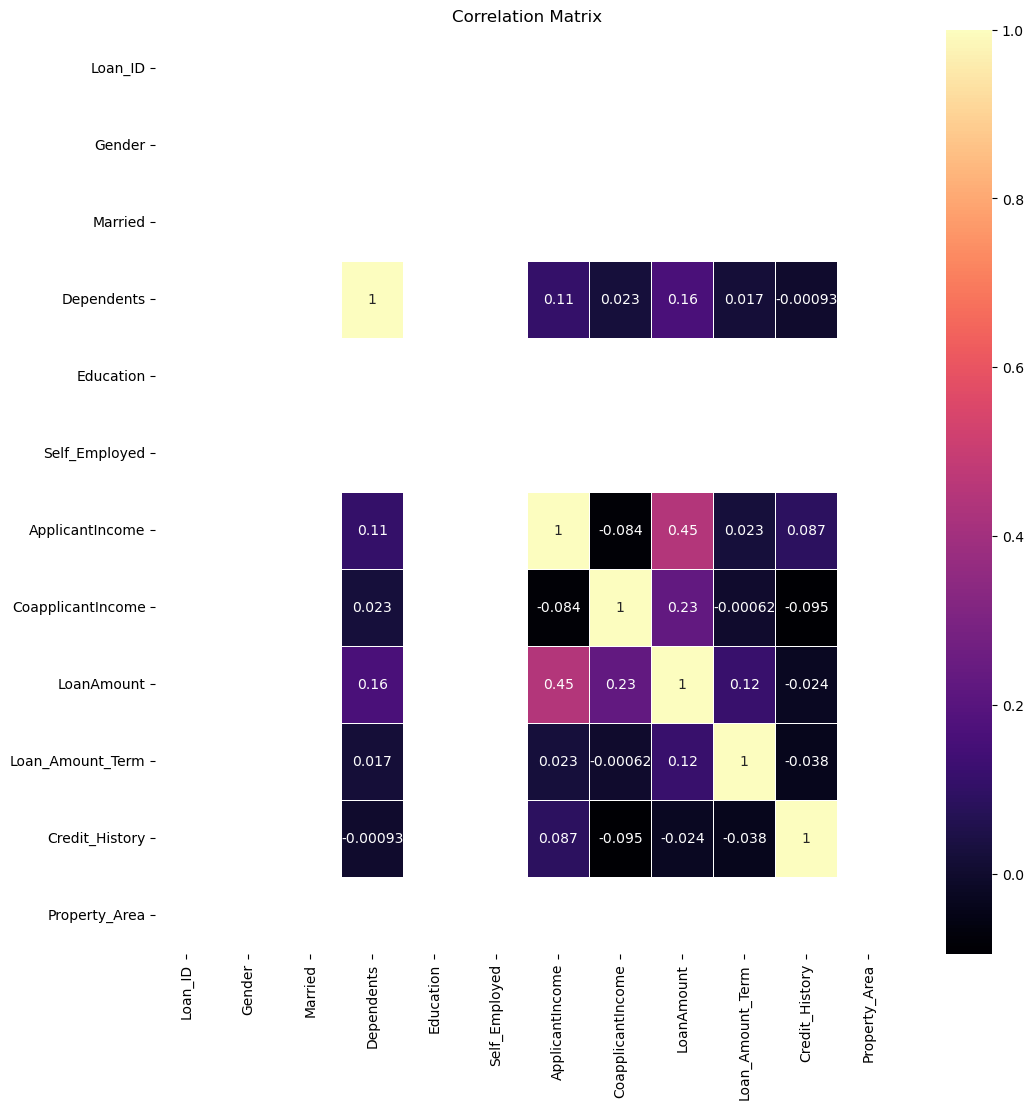

In [42]:
# Converting all the elements in the dataset to numeric values
rec_numeric= rec.apply(pd.to_numeric,errors='coerce')

plt.figure(figsize=(12,12))

# Plot a heatmap with a different color map ('magma')
sns.heatmap(rec_numeric.corr(), annot=True, cmap='magma', linewidths=.5)
plt.title('Correlation Matrix')

plt.show

In [43]:
loan_amount_data = rec['LoanAmount']

# Calculating the value of skewness and kurtosis
skewness_value = skew(loan_amount_data)
kurtosis_value = kurtosis(loan_amount_data)

print(f'Skewness value of Loan Amount: {skewness_value:.2f}')
print(f'Kurtosis value of Loan Amount: {kurtosis_value:.2f}')

Skewness value of Loan Amount: 1.77
Kurtosis value of Loan Amount: 5.62
